In [2]:
import time

from rdkit import Chem

from architector import build_complex, view_structures, convert_io_molecule

In [22]:
import rdkit
rdkit.__version__

'2025.03.2'

In [ ]:
inputDict = {
    "core": {
        "metal":'Fe', 
        'coordList': None, 
        "coreCN": 6, # also consider coreType
    },
    "ligands": [
        {
            "smiles":"n1ccccc1-c2ccccn2",
            "coordList":[0, 11], # determined/assigned manually using utils/ligand_viewing_coordinating_atom_selecting
            # Alternatively [[0,1],[11,2]], In this case it forces it to be map to the user-defined core coordinating sites.
            'ligType':'bi_cis', # Slow if not defined
        },
    ],
    "parameters": {
#        "uid": u_id, # Unique ID (generated by default, but can be assigned)
#        "ase_atoms_db_name": 'architector_ase_db_{uid}.json',
        "seed": 42,
        "metal_ox": None, # Oxidation State
        "metal_spin": None, # Spin State
        "full_spin": None, # Assign spin to the full complex (overrides metal_spin)
        "full_charge": None, # Assign charge to the complex (overrides ligand charges and metal_ox)!
        "n_conformers": 1, # Number of metal-core symmetries at each core to save / relax
        "return_only_1": False,
        "n_symmetries": 10, # NSymmetries should be >= n_conformers
        "skip_duplicate_tests": True, # Skip the duplicate tests (return all generated/relaxed configurations)
        "lig_assignment":'bruteforce', # or "similarity" - How to automatically assign ligand types.
        "force_trans_oxos": False, # Force trans configurations for oxos (Useful for actinyls)
    },
}

In [ ]:
Chem.rdmolfiles.MolFromSmiles("*<-n1c(*)c(*)c(*)c(*)c1(*) |$M;;;PortB;;PortA;;PortA;;PortA;;PortB$|")

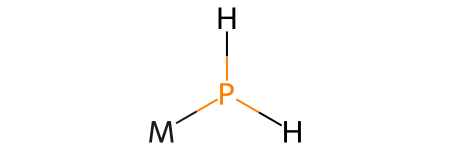

In [20]:
Chem.rdmolfiles.MolFromSmiles("*[P]([H])[H] |$M;;;;;$|", sanitize=False)

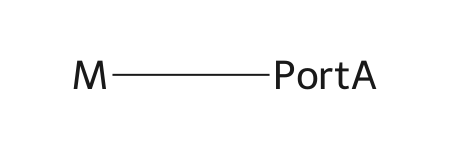

In [3]:
Chem.rdmolfiles.MolFromSmiles("** |$M;PortA$|")

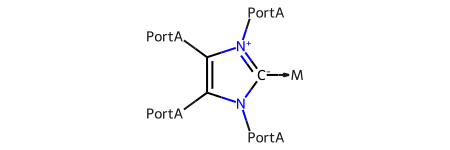

In [ ]:
Chem.rdmolfiles.MolFromSmiles("*<-[C-]1=[N+](*)C(*)=C(*)N1(*) |$M;;;PortA;;PortA;;PortA;;PortA$|")

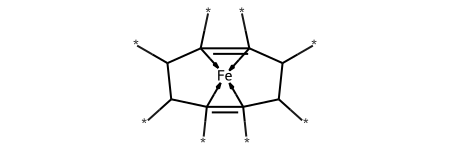

In [55]:

Chem.rdmolfiles.MolFromSmiles("*C12=C3(*)[Fe]41C(C(*)C2*)(*)=C4(*)C(*)C3(*)")

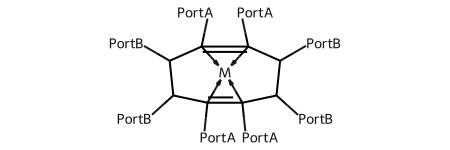

In [60]:
Chem.rdmolfiles.MolFromSmiles("*234<-C1(*)=C->2(*)C(*)C(*)C->3(*)=C->4(*)C(*)C1(*) |$M;;PortA;;PortA;;PortB;;PortB;;PortA;;PortA;;PortB;;PortB$|")

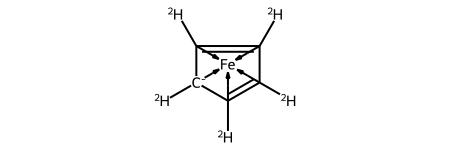

In [61]:
Chem.rdmolfiles.MolFromSmiles("[2H]C12=C3([2H])C4([2H])=C5([2H])[C-]1([2H])[Fe]5432")

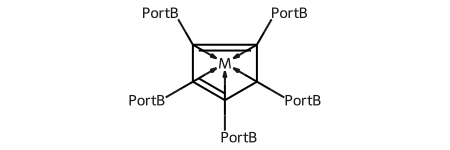

In [64]:
Chem.rdmolfiles.MolFromSmiles("*2345<-C1(*)=C->2(*)C->3(*)=C->4(*)C1->5(*) |$M;;PortB;;PortB;;PortB;;PortB;;PortB$|")

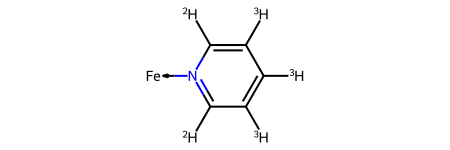

In [65]:
Chem.rdmolfiles.MolFromSmiles("[3H]C1=C([3H])C([2H])=[N]([Fe])C([2H])=C1[3H]")

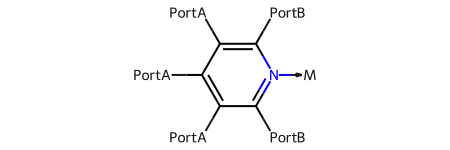

In [68]:
Chem.rdmolfiles.MolFromSmiles("*<-n1c(*)c(*)c(*)c(*)c1(*) |$M;;;PortB;;PortA;;PortA;;PortA;;PortB$|")

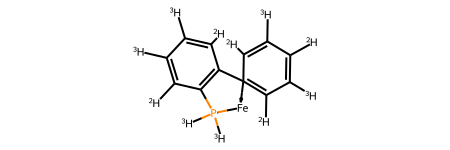

In [69]:
Chem.rdmolfiles.MolFromSmiles("[3H][P]([Fe]1)([3H])C2=C(C31=C([2H])C([3H])=C([2H])C([3H])=C3[2H])C([2H])=C([3H])C([3H])=C2[2H]")

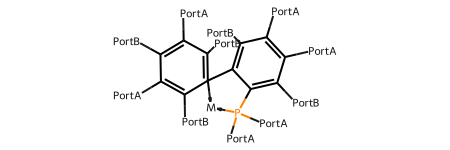

In [72]:
Chem.rdmolfiles.MolFromSmiles("*1<-P(*)(*)c2c(*)c(*)c(*)c(*)c2c->13c(*)c(*)c(*)c(*)c3(*) |$M;;PortA;PortA;;;PortB;;PortA;;PortA;;PortB;;;;PortB;;PortA;;PortB;;PortA;;PortB$|")

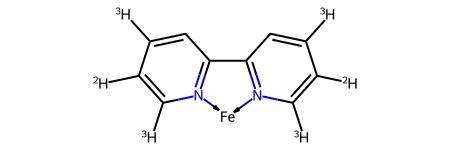

In [73]:
Chem.rdmolfiles.MolFromSmiles("[3H]C1=CC(C2=[N]3C([3H])=C([2H])C([3H])=C2)=[N]([Fe]3)C([3H])=C1[2H]")

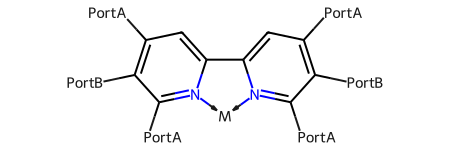

In [75]:
Chem.rdmolfiles.MolFromSmiles("*1<-n2c(*)c(*)c(*)cc2c3cc(*)c(*)c(*)n->13 |$M;;;PortA;;PortB;;PortA;;;;;;PortA;;PortB;;PortA;$|")

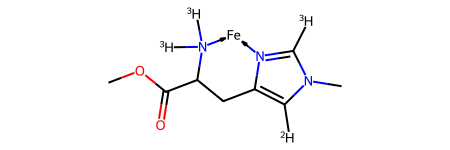

In [76]:
Chem.rdmolfiles.MolFromSmiles("O=C(C1[N]([3H])([3H])[Fe][N]2=C([3H])N(C)C([2H])=C2C1)OC")

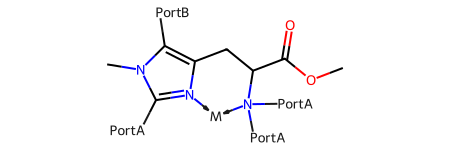

In [79]:
Chem.rdmolfiles.MolFromSmiles("*1<-n2c(*)n(C)c(*)c2CC(C(=O)OC)N->1(*)(*) |$M;;;PortA;;;;PortB;;;;;;;;;PortA;PortA$|")

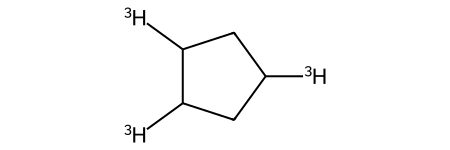

In [138]:
Chem.rdmolfiles.MolFromSmiles("[3H]C1CC([3H])C(C1)[3H]")

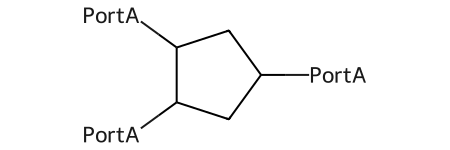

In [139]:
Chem.rdmolfiles.MolFromSmiles("*C1CC(*)C(*)C1 |$PortA;;;;PortA;;PortA;$|")

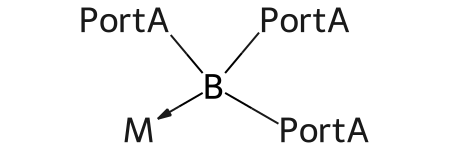

In [143]:
Chem.rdmolfiles.MolFromSmiles("*<-B(*)(*)* |$M;;PortA;PortA;PortA$|")

In [ ]:
Chem.rdmolfiles.MolFromSmiles("*<-B(*)(*)* |$M;;PortA;PortA;PortA$|")

In [7]:
#%%timeit

out = build_complex(inputDict)

## View Output

In [19]:
print(len(out))
out.keys()

4


odict_keys(['octahedral_0_nunpairedes_4_charge_2', 'hexagonal_planar_0_nunpairedes_4_charge_2', 'trigonal_prismatic_0_nunpairedes_4_charge_2', 'pentagonal_pyramidal_0_nunpairedes_4_charge_2'])

In [8]:
view_structures(out)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Export Molecule

### As XYZ

In [11]:
out.keys()

odict_keys(['octahedral_0_nunpairedes_4_charge_2', 'hexagonal_planar_0_nunpairedes_4_charge_2', 'trigonal_prismatic_0_nunpairedes_4_charge_2', 'pentagonal_pyramidal_0_nunpairedes_4_charge_2'])

In [12]:
out['octahedral_0_nunpairedes_4_charge_2']['ase_atoms'].write('octahedral_0_nunpairedes_4_charge_2.xyz')

### As XYZ

In [13]:
mol = convert_io_molecule(out['octahedral_0_nunpairedes_4_charge_2']['mol2string'])
# Includes:
#   - molecular graph
#   - SYBYL type bond orders
#   - unpaired electrons (mol.xtb_uhf)
#   - full ASE Atoms object (mol.ase_atoms)
#   - Assigned charge (mol.charge) 
#   - magnetic moments (mol.uhf)

In [17]:
mol.__dict__.keys()

dict_keys(['dists_sane', 'sanity_check_dict', 'ase_atoms', 'atom_types', 'graph', 'BO_dict', 'charge', 'uhf', 'xtb_uhf', 'xtb_charge'])

In [18]:
mol.graph

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(33, 33))

In [15]:
print(mol.uhf) # n_unpaired electrons for electronic structure evaluation
print(mol.charge) # total charge
mol.write_xyz('octahedral_0_nunpairedes_4_charge_2.xyz')

4
2.0


In [20]:
type(mol)

architector.io_molecule.Molecule